# Business Climate

* Sports Wear Group is a leading retailer in the sports goods industry with over 50 branches.
* They are undergoing a digital transformation to stay ahead in the market.

# Business Objective

* Increase marketing efficiency.
* Boost overall sales performance.
* Use advanced analytics for better insights.

# Exploring the Problem and Its Impact

* Inefficiencies in marketing campaigns and unclear factors affecting campaign success.
* The need to understand the impact of promotional activities and product characteristics on sales.

# The Notebook

### Importing libraries needed for the advanced analysis

In [149]:
# Data manipulation and display
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pylab

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, skew
from statsmodels.stats.multitest import multipletests
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine learning and preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# LIME for model explanation
import lime
import lime.lime_tabular

# Configure pandas display options
pd.set_option('display.float_format', '{:,.1f}'.format)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Plot size configuration
plotsize = (13, 5)
%matplotlib inline

# Data Understanding

In [150]:
df = pd.read_csv('full_gen_data[1].csv')

In [151]:
df.head()   

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,6.0,4.0,0.7,2016-03-27,0,0,"1,003.0",OC6355,SHOES,TRAINING,13.3,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,6.0,4.0,0.7,2016-03-27,0,0,"1,003.0",AP5568,SHORTS,TRAINING,2.3,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,6.0,4.0,0.7,2016-03-27,0,0,"1,003.0",CB8861,HARDWARE ACCESSORIES,GOLF,1.7,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,6.0,4.0,0.7,2016-03-27,0,0,"1,003.0",LI3529,SHOES,RUNNING,9.0,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,6.0,4.0,0.7,2016-03-27,0,0,"1,003.0",GG8661,SHOES,RELAX CASUAL,9.6,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [152]:
df.shape

(100000, 24)

In [153]:
df.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label'],
      dtype='object')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [155]:
df.sample(1).iloc[0]

country                       Germany
article                        QO8312
sales                              43
regular_price                    92.0
current_price                    29.9
ratio                             0.3
retailweek                 2016-05-08
promo1                              0
promo2                              0
customer_id                     870.0
article.1                      LI3529
productgroup                    SHOES
category                      RUNNING
cost                              9.0
style                         regular
sizes             xxs,xs,s,m,l,xl,xxl
gender                           kids
rgb_r_main_col                    205
rgb_g_main_col                    140
rgb_b_main_col                    149
rgb_r_sec_col                     164
rgb_g_sec_col                     211
rgb_b_sec_col                     238
label                               0
Name: 37953, dtype: object

In [156]:
#remove the customer_id column
df = df.drop(columns='customer_id')

Having a look on the target Variable

In [157]:
df.label.value_counts()

label
0    86072
1    13928
Name: count, dtype: int64

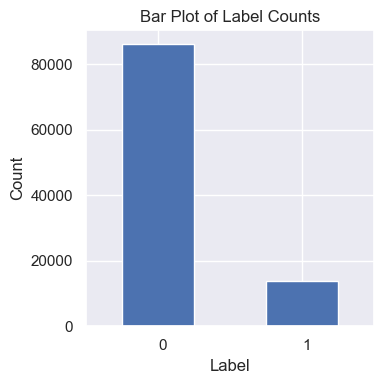

In [158]:
sns.set(style="darkgrid")
ax = df["label"].value_counts().plot(kind="bar", figsize=(4, 4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='left')
plt.title('Bar Plot of Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

It is shown that the there is class imbalance.However,we will handle class imbalance at the modeling step but will **bear in mind the class imbalance** throughout out analysis journey.

In [159]:
#inspectig categorical colums

In [160]:
for v in df.select_dtypes(include='object').columns:
    print('column :', v)
    print('unique values: ', df[v].nunique())
    print('values counts are : \n', df[v].value_counts())
    print('\n--------------------\n' )

column : country
unique values:  3
values counts are : 
 country
Germany    49400
Austria    35140
France     15460
Name: count, dtype: int64

--------------------

column : article
unique values:  477
values counts are : 
 article
BR3179    610
MR4948    560
XG6449    550
AA7884    540
OP1184    520
VS6613    510
QS5396    510
CB4942    510
ST3419    490
ZE9366    480
MA7179    480
XC9518    480
TX1463    480
IR3275    460
BS7795    460
EZ8648    450
MM4542    450
ZU5523    450
YX1723    440
KJ9185    430
HM5731    430
EF6812    420
RF6881    410
AP5568    410
PW6278    410
LH8921    410
DZ3492    410
WF4276    400
TX8432    400
LR5226    400
XH6675    390
JG1582    390
QS1816    380
QO8312    370
GJ5184    370
ZV2187    370
OC6355    370
ML2223    360
YX2167    360
UD3728    360
DI9187    360
VF7316    350
PY1913    350
TN7113    350
SA2925    350
ZZ2466    340
XN6238    340
LD8468    340
HZ9888    340
DW8683    340
OY4474    340
RV9228    330
UR7332    330
WJ9718    330
FE6662    33

In [161]:
# create a list of column names with dtype 'object'
object_cols = list(df.select_dtypes(include=['object']).columns)
numerical_cols = list(df.select_dtypes(exclude=['object']).columns)

* The data is only covering three countries [Germany, Austria , France]
* Article column is of a high cardinality
* retailweek isn't sorted in chronological order

# Data Preprocessing

In [162]:
## checking null values
df.isna().sum()

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
dtype: int64

The data has no null values

In [163]:
#Plotting distributionS and IQR

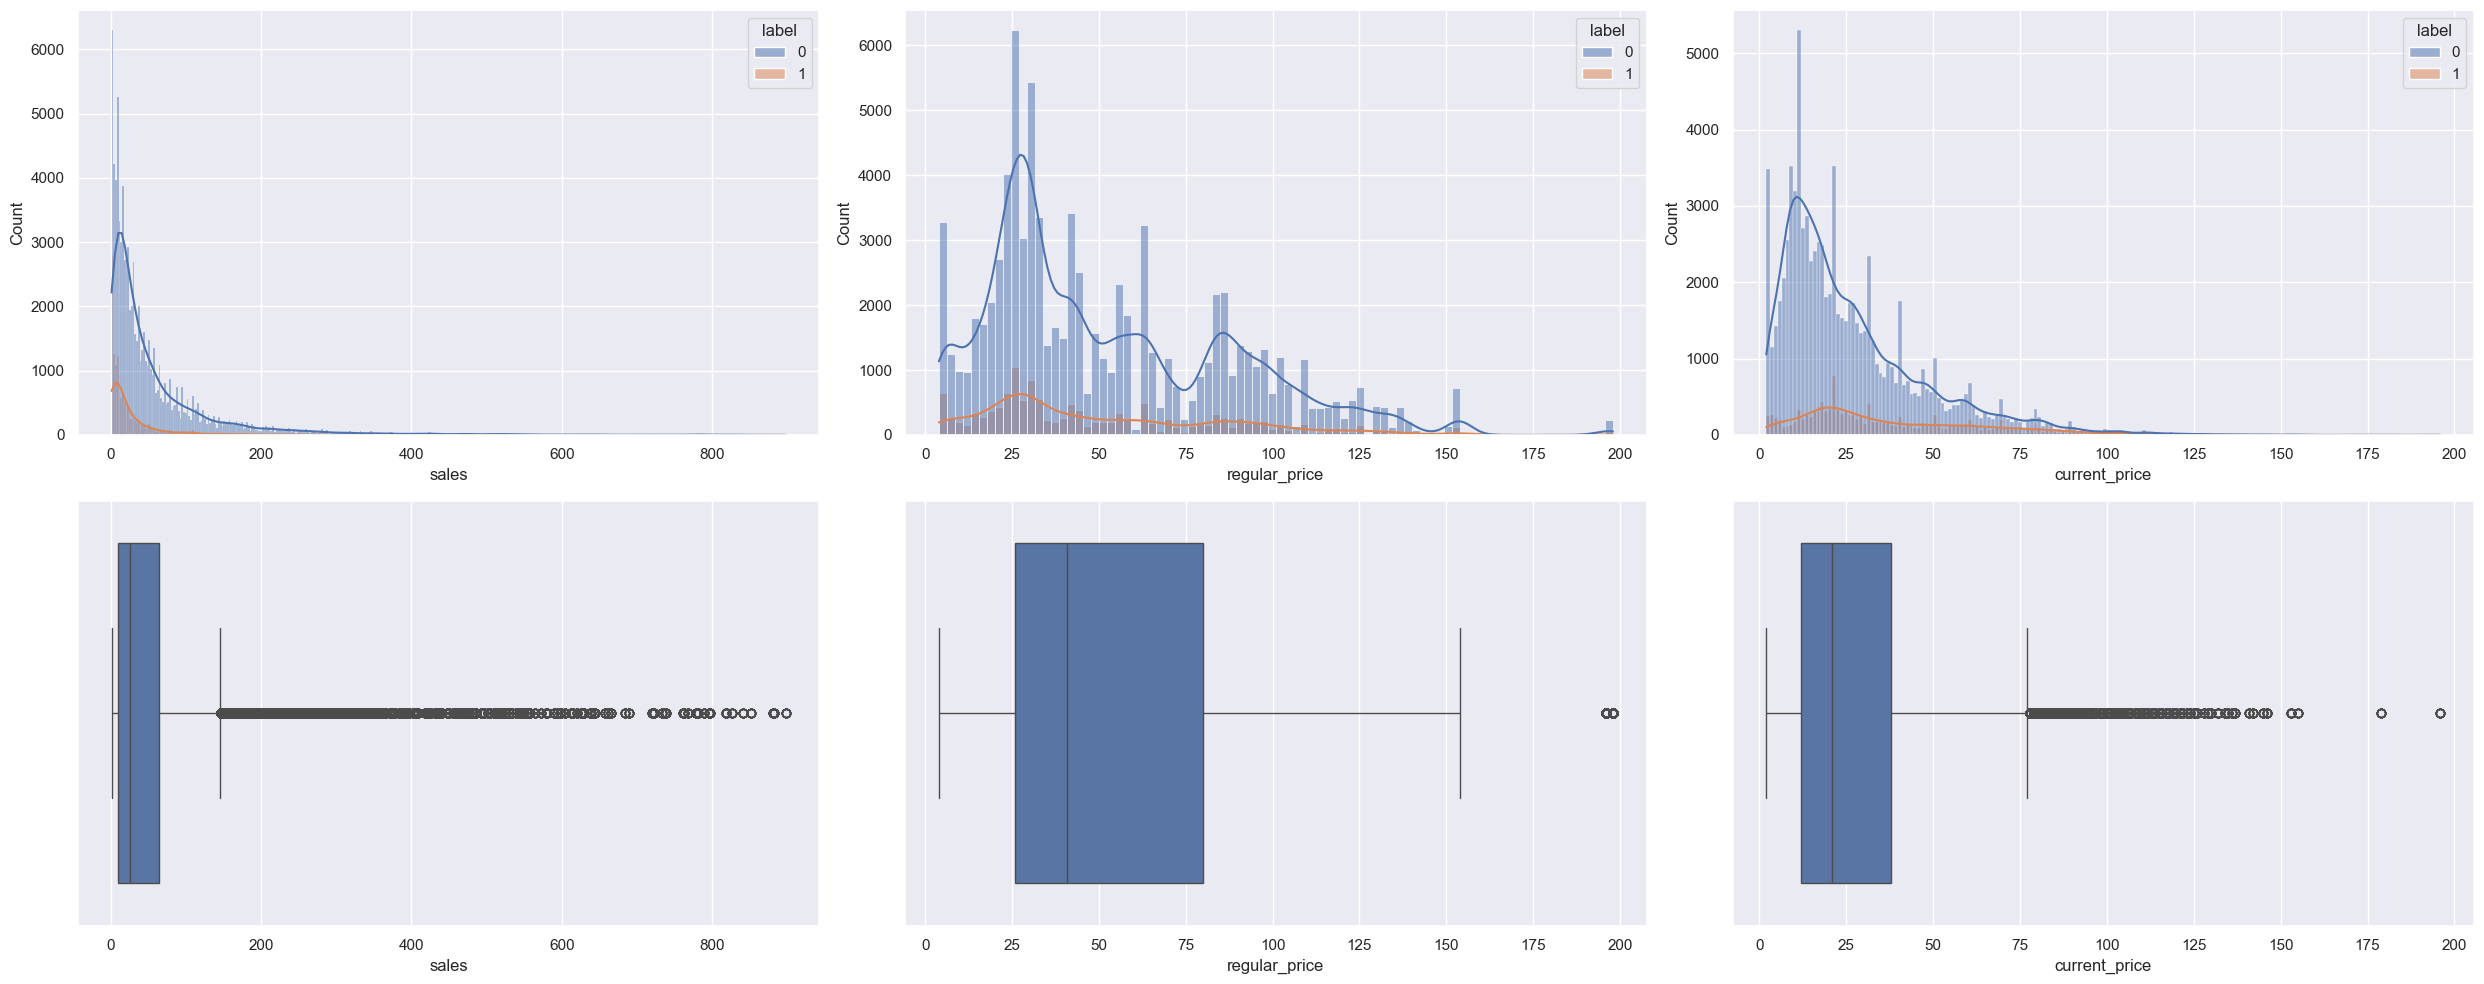

In [164]:
sns.set(style="darkgrid")
numeric_columns = ['sales', 'regular_price', 'current_price']  # replace with your columns
fig, axes = plt.subplots(2, len(numeric_columns), figsize=[25, 10])
j = 0
colors = ['#E1728F', '#409E7D']
for i in numeric_columns:
    sns.histplot(data=df, x=i, kde=True, ax=axes[0, j], hue='label')
    sns.boxplot(data=df, x=i, ax=axes[1, j])
    j += 1
plt.tight_layout()
plt.show()

We can find upon the plots
* The distributions are right skewed,yet performing a log tranfromation would potentailly make the columns more normally distributed
* Taking the nature of the features into consideration,it makes sense that some products might have higher sales and prices.
* We won't deal with extreme values as outliers,an adjusted box plot might give us better illustration give the skewness

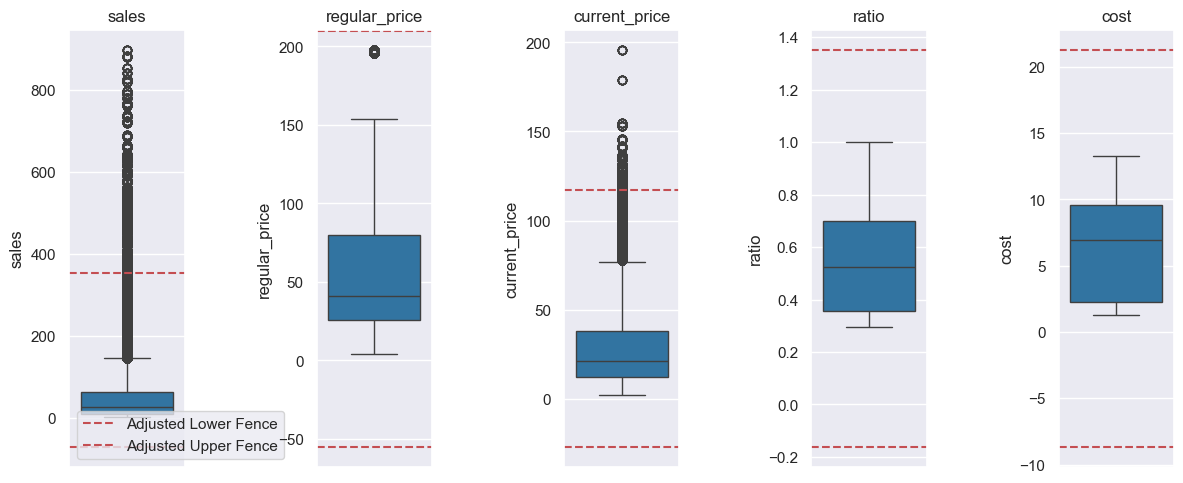

In [165]:
# will foucs on ('sales','regular_price','current_price', 'ratio', 'cost') since promo columns are binary and rgb represent colors
sns.set(style="darkgrid")
def adjusted_boxplot(data, ax, title, color, show_legend=False):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    skewness = skew(data)
    if skewness > 0:
        upper_fence += skewness * iqr
    else:
        lower_fence -= abs(skewness) * iqr   
    sns.boxplot(data=data, ax=ax, color=color)
    ax.set_title(title)
    ax.axhline(lower_fence, color='r', linestyle='--', label='Adjusted Lower Fence')
    ax.axhline(upper_fence, color='r', linestyle='--', label='Adjusted Upper Fence')
    if show_legend:
        ax.legend()
numeric_columns = ['sales', 'regular_price', 'current_price','ratio','cost']
fig, axes = plt.subplots(1, len(numeric_columns), figsize=[12, 5])
for j, i in enumerate(numeric_columns):
    show_legend = (j == 0)  # Show legend only on the first subplot
    adjusted_boxplot(df[i].dropna(), ax=axes[j], title=i, color='#1f77b4', show_legend=show_legend)
plt.tight_layout()
plt.show()

In [166]:
# retail to datetime
df.retailweek = pd.to_datetime(df.retailweek)

In [167]:
# sort the dataset by the date column
df = df.sort_values('retailweek')

In [168]:
df.retailweek.describe( )

count                        100000
mean     2016-02-25 04:31:52.320000
min             2014-12-28 00:00:00
25%             2015-07-26 00:00:00
50%             2016-02-21 00:00:00
75%             2016-10-02 00:00:00
max             2017-04-30 00:00:00
Name: retailweek, dtype: object

The covered retail weeks are between 2014-12-28 to 2017-04-30 

In [169]:
## adding new features regarding retailweek
df['year'] = df.retailweek.dt.year
df['month'] = df.retailweek.dt.month
df['day'] = df.retailweek.dt.day
df['DayOfWeek_No'] = df.retailweek.dt.dayofweek
# convert the MonthOfYear column to a formatted string
df['MonthOfYear'] = df['retailweek'].dt.strftime('%b %Y')

* Since we have a feature for sales,creating a feauture for profit to compare sales and profit will help us in our analysis

In [170]:
df['profit'] = df['current_price'] - df['cost']

# Exploratory Data Analysis

<Axes: >

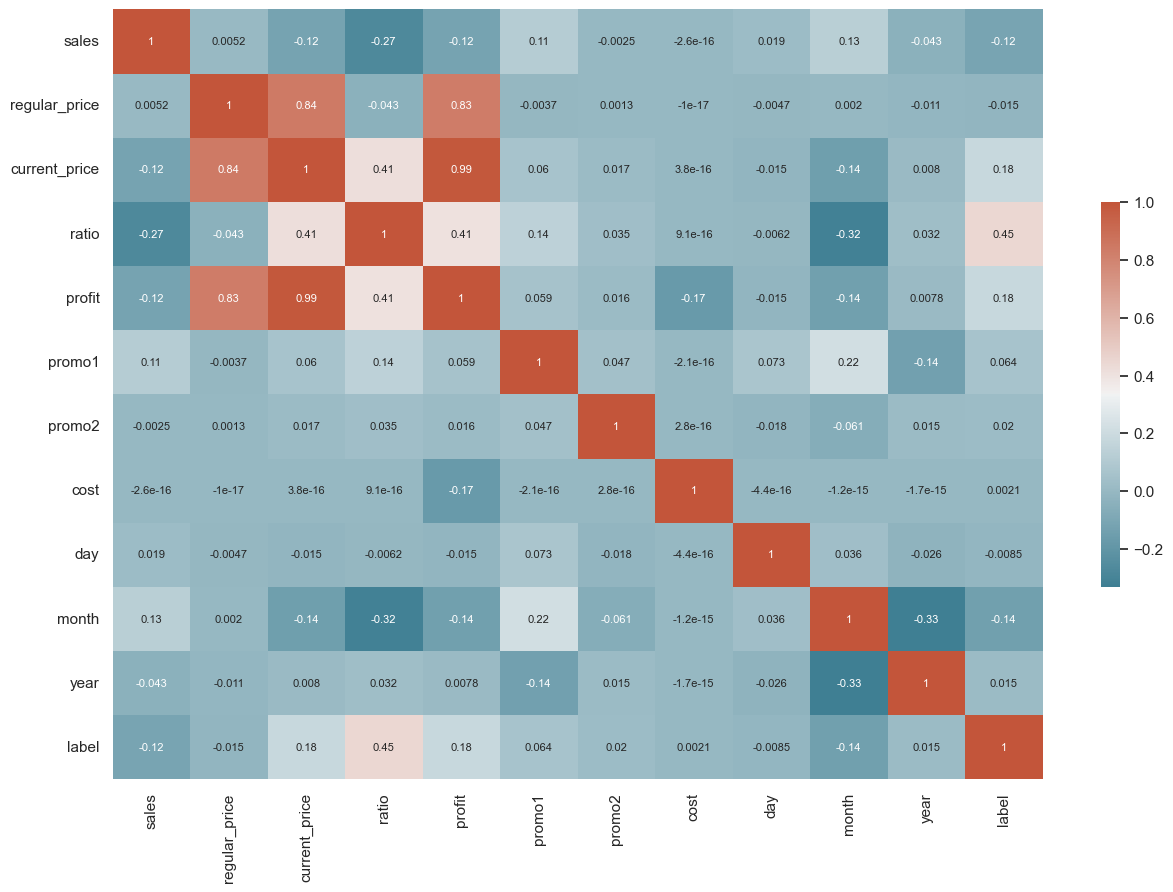

In [171]:
# calculate correlation matrix
cols= ['sales', 'regular_price', 'current_price',
       'ratio','profit', 'promo1', 'promo2','cost','day', 'month',
       'year','label']

corr = df[cols].corr(numeric_only= True)# plot the heatmap

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True),                        
            cbar_kws={"shrink": .5}, annot=True,annot_kws={"fontsize":8}
           )

* regular_prices, current_prices have a highly positive correlation, we can think to derive a new feature from these two and use it instead
* ratio has the highest correlation with label

## Does Purchasing Behaviour differ accross countries?

In [172]:
# count of occurrences for each country
country_counts = df['country'].value_counts()
print("Country Counts:")
print(country_counts)
print()  
# proportions
country_counts_normalized = df['country'].value_counts(normalize=True)
print("Country Proportions:")
print(country_counts_normalized)

Country Counts:
country
Germany    49400
Austria    35140
France     15460
Name: count, dtype: int64

Country Proportions:
country
Germany   0.5
Austria   0.4
France    0.2
Name: proportion, dtype: float64


* We can say that nearly half of the instances of our data are for Germany ,this is a point to take in mind.

In [173]:
# Group by country and sum sales
country_sales = df.groupby('country')['sales'].sum().reset_index()
labels = country_sales['country'].tolist()
values = country_sales['sales'].tolist()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])
fig.update_layout(title='Sales Distribution by Country', height=400, width=700)
fig.show()

The sales distribuition resemples the country original ditribution

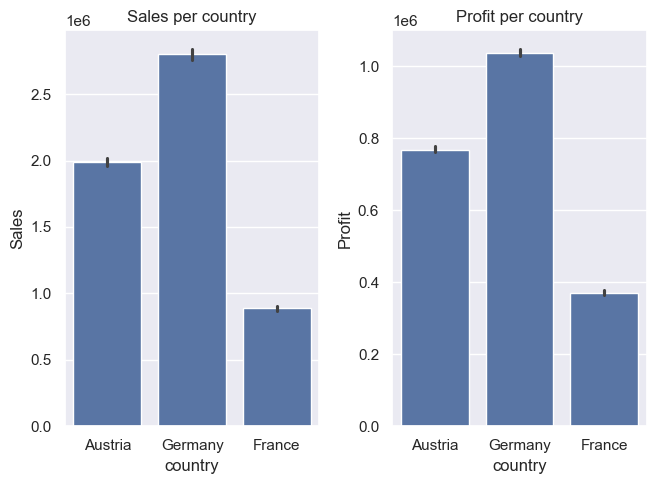

In [174]:
# compute sales and profit per country
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.barplot(data = df, x= 'country',y='sales',estimator='sum')
plt.ylabel('Sales')
plt.title('Sales per country')

plt.subplot(1, 3, 2)
sns.barplot(data = df, x= 'country',y='profit',estimator='sum')
plt.ylabel('Profit')
plt.title('Profit per country')
plt.tight_layout()  
plt.show()

* The profit per country resemples the sales per country,which is also a benign finding.

Lets have a look on the conversion  across countries

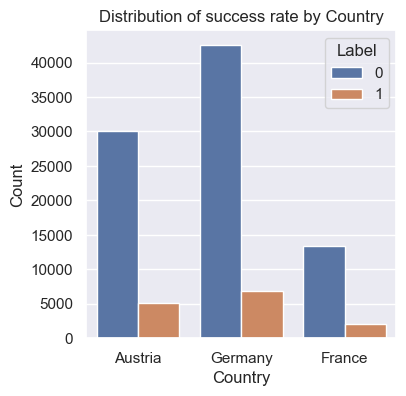

In [175]:
plt.figure(figsize=(4, 4))
sns.set(style="darkgrid")
sns.countplot(data=df, x='country', hue='label')
plt.title('Distribution of success rate by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Label', loc='upper right')
plt.show()

In [176]:
# countries proportions
proportions = df.groupby(['country', 'label']).size().unstack().fillna(0)
proportions['total'] = proportions.sum(axis=1)
proportions['prop_label_1'] = proportions[1] / proportions['total']

for index, row in proportions.iterrows():
    print(f"Country: {index}")
    print(f"  Proportion of label 1: {row['prop_label_1']:.3f}\n")

Country: Austria
  Proportion of label 1: 0.144

Country: France
  Proportion of label 1: 0.132

Country: Germany
  Proportion of label 1: 0.138



#### Although the distribution of labels accross countries remples the sales and the countries distribution where Germany being the highest,the proportion of the conversion rate in Austria appears to be the highest,taking into consideration the total for each respective country.

A chi square test will give us a solid determination that the conversion rate differs accross countries

In [177]:
# contingency table
contingency_table = pd.crosstab(df['country'], df['label'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
if p < 0.05:
    print("There is a significant association between country and label.")
else:
    print("There is no significant association between country and label.")

Chi-Square Statistic: 11.731614248787466
p-value: 0.002834734138820402
There is a significant association between country and label.


* We can now say more confidently that the buying decisoin is different across these countries.
* **Yet,** since a significant chi square test doesn't tell if there is a group responsible for such association,we will do a **piarwise Chi-Square with Bonferroni correction**.

In [178]:
def pairwise_chi2(data, column, target):
    countries = data[column].unique()
    p_values = []
    pairs = []
    for i in range(len(countries)):
        for j in range(i+1, len(countries)):
            country1 = countries[i]
            country2 = countries[j]
            subset = data[data[column].isin([country1, country2])]
            contingency_table = pd.crosstab(subset[column], subset[target])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            p_values.append(p)
            pairs.append((country1, country2))
    return p_values, pairs
    
p_values, pairs = pairwise_chi2(df, 'country', 'label')
adjusted_p_values = multipletests(p_values, method='bonferroni')[1]
for i in range(len(pairs)):
    print(f"Comparison: {pairs[i][0]} vs {pairs[i][1]}, Adjusted p-value: {adjusted_p_values[i]}")
for i in range(len(pairs)):
    if adjusted_p_values[i] < 0.05:
        print(f"There is a significant difference between {pairs[i][0]} and {pairs[i][1]}")
    else:
        print(f"No significant difference between {pairs[i][0]} and {pairs[i][1]}")

Comparison: Austria vs Germany, Adjusted p-value: 0.10484584802147368
Comparison: Austria vs France, Adjusted p-value: 0.0028036710584302565
Comparison: Germany vs France, Adjusted p-value: 0.18091495185856885
No significant difference between Austria and Germany
There is a significant difference between Austria and France
No significant difference between Germany and France


* The results of the pair-waise test do **support our prior hypothesis and visualisations** that the conversion rate in Austria is significant among the three,dispite the class imbalance being in favour of Germany.

## How does Promos affect the buying behaviour?

In [179]:
grouped = df.groupby(['promo1','promo2', 'label']).size().unstack()
#ratio of label=1 to label=0 by promo1 and promo2
grouped['promo1'] = grouped[1] / grouped[0] 
grouped['promo1']

promo1  promo2
0       0        0.2
        1        0.2
1       0        0.3
        1        0.6
Name: promo1, dtype: float64

Instances where promo1 and promo2 were **active** showed effictevenss ratio of 0.6 while instances of both promos being **inactive** showed a effictevenss ratio of 0.2

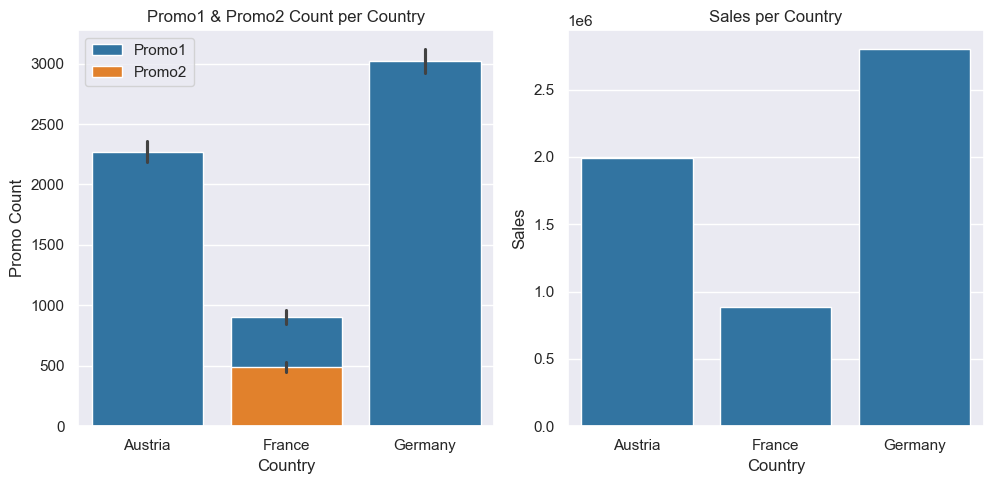

In [180]:
grouped_df_sales = df.groupby('country')['sales'].sum().reset_index()
sns.set(style="darkgrid")
plt.figure(figsize=(15, 5))

# sales per country
plt.subplot(1, 3, 2)
sns.barplot(data=grouped_df_sales, x='country', y='sales', color='#1f77b4')  # Standard blue color
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('Sales per Country')

order = grouped_df_sales['country']
# promo1 and promo2 by country
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='country', y='promo1', estimator='sum', color='#1f77b4', label='Promo1', order=order)  # Standard blue color
sns.barplot(data=df, x='country', y='promo2', estimator='sum', color='#ff7f0e', label='Promo2', order=order)  # Standard orange color
plt.xlabel('Country')
plt.ylabel('Promo Count')
plt.title('Promo1 & Promo2 Count per Country')
plt.legend()

plt.tight_layout()
plt.show()

Based on the first and second graphs, it can be observed that there is a strong and positive correlation between sales and promotions. The data suggests that countries with a higher number of promotions tend to have higher sales. In other words, as the number of promotions launched in a country increases, the sales also tend to increase

In [181]:
# group the dataset by country and count the occurrences where promo1 = 1 and promo2 = 1
promo1_counts = df[df['promo1'] == 1].groupby('country').size()
promo2_counts = df[df['promo2'] == 1].groupby('country').size()

for country in df['country'].unique():
    print(f"Country: {country}")
    print(f"Promo1 Count: {promo1_counts.get(country, 0)}")
    print(f"Promo2 Count: {promo2_counts.get(country, 0)}")
    print()

Country: Austria
Promo1 Count: 2270
Promo2 Count: 0

Country: Germany
Promo1 Count: 3020
Promo2 Count: 0

Country: France
Promo1 Count: 900
Promo2 Count: 490



* While Promo1 had been lauched in all three countries, Promo2 only had been launched in France

In [182]:
# Promo1/Promo2 Comparison

Since we don't have data for Promo2 in all countries,we can focus on how each country responded to promo1.We can do comparison for Promo2 and Promo1 only in France

In [183]:
# list of unique countries in the dataset
countries = df['country'].unique()
for country in countries:
    filtered_df = df[(df['country'] == country) & (df['promo1'] == 1) & (df['label'] == 1) & (df['promo2'] == 0)]
    success_rate = (len(filtered_df) / len(df[(df['country'] == country) & (df['promo1'] == 1) & (df['promo2'] == 0)])) * 100
    print(f"Promo1 Success Rate for {country}: {success_rate}%")

Promo1 Success Rate for Austria: 22.86343612334802%
Promo1 Success Rate for Germany: 22.251655629139073%
Promo1 Success Rate for France: 20.759493670886076%


* To have a more graps of the resulte,we can think of performing A/B testing to compare the successful buying of custmers with and without promo1
* We could think of a number of statistical test to help us in A/B testing process,we could go with Chi square since it is a non parametric test so we don't have to examine the assumptions of Z and T tests for now.

In [184]:
def perform_ab_test(data, promo_col, label_col, categorical_col):
    """
    Perform A/B testing using Chi-Squared test to compare conversion rates across different categories of a categorical column.
    """
    results = []
    categories = data[categorical_col].unique()
    print("\n*********** A/B Testing Results for Promo1 ***********")
    for category in categories:
        subset = data[data[categorical_col] == category]
        contingency_table = pd.crosstab(subset[promo_col], subset[label_col])
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        results.append({
            'Category': category,
            'Chi2 Statistic': chi2_stat,
            'P-value': p_value
        })
    results_df = pd.DataFrame(results) 
    return results_df
results_df = perform_ab_test(df, 'promo1', 'label', 'country')
print(results_df)


*********** A/B Testing Results for Promo1 ***********
  Category  Chi2 Statistic  P-value
0  Austria           142.2      0.0
1  Germany           190.1      0.0
2   France            76.6      0.0


* Promo1 is effective in increasing conversion rates in all three countries. The statistical significance (p-value of 0.00) across Austria, Germany, and France suggests that the observed differences in conversion rates are not due to random chance, and the promotion had a positive impact.

In [185]:
#  the success rate for promo2 in france
filtered_df2 = df[(df['country'] == 'France') & (df['promo1'] == 0) & (df['label'] == 1) & (df['promo2'] == 1)]
success_rate2 = (len(filtered_df) / len(df[(df['country'] == 'France') & (df['promo1'] == 0) & (df['promo2'] == 1)] )) * 100
print(f"\nPromo2 Success Rate for France: {success_rate2}%")


Promo2 Success Rate for France: 43.15789473684211%


* Customers in France respond more to store events than media advirstemsments since the coversion rate for promo2 is nearly double promo1.
* It is resommended to launch promo2 as well in Germany and Austria due to its significant results.

## A closer look on Products and Categories

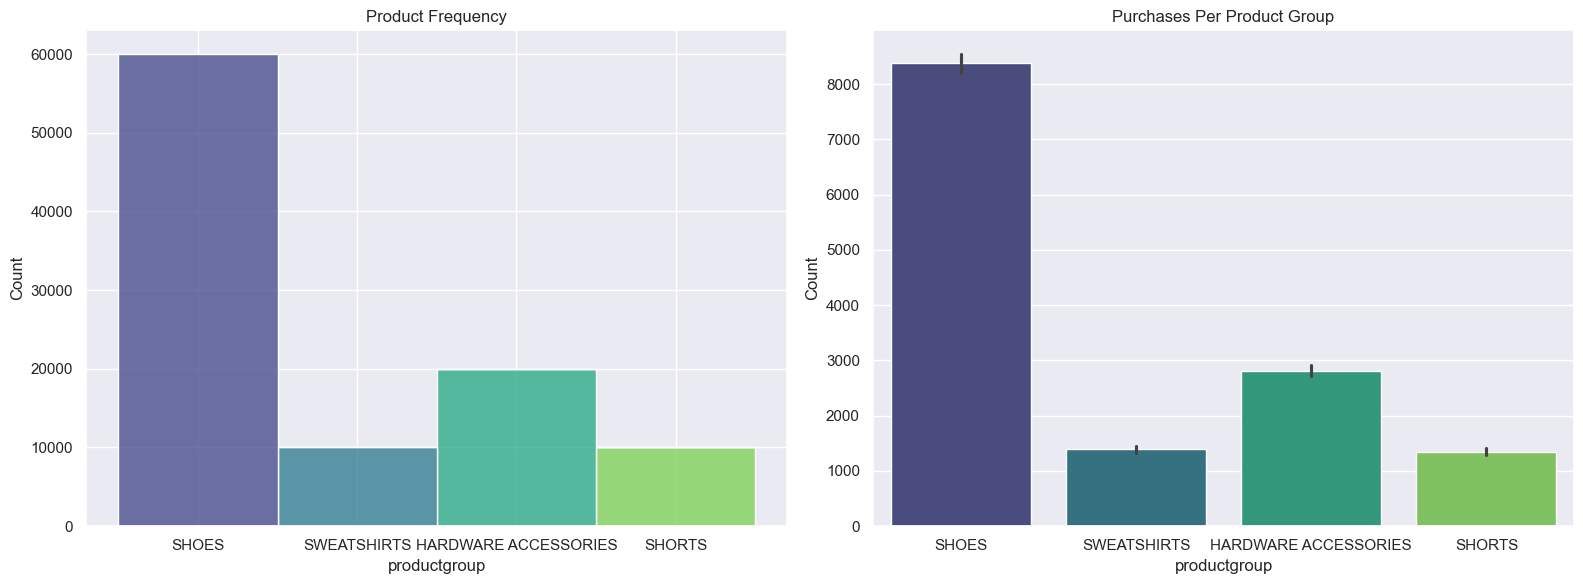

In [186]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=df, x='productgroup', hue='productgroup', multiple='stack', ax=axes[0], palette='viridis')
axes[0].set_ylabel('Count')
axes[0].set_title('Product Frequency')
axes[0].legend_.remove()  # Remove legend
# purchases per product group
sns.barplot(data=df, x='productgroup', y='label', estimator='sum', ax=axes[1], palette='viridis')
axes[1].set_ylabel('Count')
axes[1].set_title('Purchases Per Product Group')
plt.tight_layout()
plt.show()

* Number of products in the data is imbalnced favouring shoes
* The most purchases happened in shoes category, followed by  Hardware Accessories, sweatshirts and shorts,resempling the orginal frequesncy of the products.

**What is the amount of purchases done in each category"?**

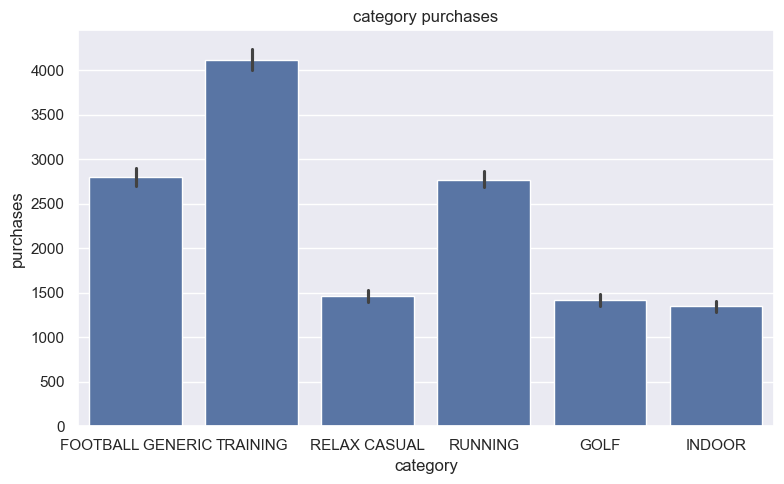

In [187]:
# plot a bar plot to compute amount of purchases per category
sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))

sns.barplot(data= df, x='category', y='label',estimator='sum')


plt.title('category purchases')
plt.ylabel('purchases')
plt.xlabel('category')
plt.tight_layout()
plt.show()

In [188]:
#ratio of purchases to the total number of items in that category
categories = df['category'].unique()
for category in categories:
    filtered_df = df[(df['category'] == category) & (df['label'] == 1)]
    percentage_rate = (len(filtered_df) / len(df[(df['category'] == category)])) * 100
    print(f"percentage of purchases for {category}: {percentage_rate}%")

percentage of purchases for FOOTBALL GENERIC: 14.01%
percentage of purchases for TRAINING: 13.736666666666666%
percentage of purchases for RELAX CASUAL: 14.67%
percentage of purchases for RUNNING: 13.865%
percentage of purchases for GOLF: 14.17%
percentage of purchases for INDOOR: 13.48%


* Although Training category has the most purchases, all categories have approximately the same ratio of purchases

**How many purchases done per gender?**

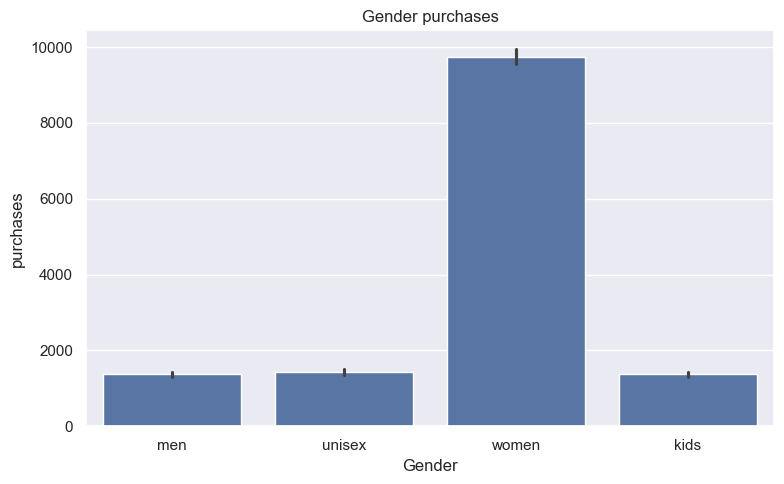

In [189]:
# plot a bar plot to compute amount of purchases per gender
sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))
sns.barplot(data= df, x='gender', y='label',estimator='sum')
plt.title('Gender purchases')
plt.ylabel('purchases')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

In [190]:
# percentage of purchases for each target customer group
genders = df['gender'].unique()
for gender in genders:
    filtered_df = df[(df['gender'] == gender) & (df['label'] == 1)]
    percentage_rate = (len(filtered_df) / len(df[(df['gender'] == gender)])) * 100
    print(f"percentage of purchases for {gender}: {percentage_rate}%")

percentage of purchases for men: 13.76%
percentage of purchases for unisex: 14.26%
percentage of purchases for women: 13.928571428571429%
percentage of purchases for kids: 13.76%


* Women,who have 70000 appearances in the dataset have the most purchases.
* Having said that,the percentage purchases among different target customers are highest for unisex.

**What are most sold articles in each country**

In [191]:
# group by 'country' and getting the most sold article in each group
most_sold_articles = df.groupby('country')['article'].apply(lambda x: x.value_counts().idxmax()).reset_index()
most_sold_articles.columns = ['country', 'most_sold_article']
most_sold_rows = df.merge(most_sold_articles, how='inner', left_on=['country', 'article'], right_on=['country', 'most_sold_article'])

for _, row in most_sold_articles.iterrows():
    country = row['country']
    article = row['most_sold_article']
    print(f"Country: {country}")
    print(f"Most Sold Article: {article}")
    print("Related Features:")
    related_features = most_sold_rows[most_sold_rows['country'] == country].drop_duplicates(subset='article')[['article', 'productgroup', 'category', 'gender']]
    print(related_features)
    print()

Country: Austria
Most Sold Article: XC9518
Related Features:
   article productgroup  category gender
10  XC9518        SHOES  TRAINING  women

Country: France
Most Sold Article: TC9631
Related Features:
   article productgroup  category gender
30  TC9631        SHOES  TRAINING  women

Country: Germany
Most Sold Article: BX8284
Related Features:
  article productgroup category gender
0  BX8284        SHOES   INDOOR  women



## Time series analysis: Does purchasing behaviur changes accross time?

In [192]:
df['MonthOfYear'] = pd.to_datetime(df['MonthOfYear'], format='%b %Y')
grouped_data = df.groupby(['MonthOfYear', 'country'])['sales'].sum().reset_index()
traces = []
countries = df['country'].unique()
for country in countries:
    country_data = grouped_data[grouped_data['country'] == country]
    trace = go.Scatter(
        x=country_data['MonthOfYear'], 
        y=country_data['sales'], 
        name=country,
        mode='lines'
    )
    traces.append(trace)
layout = go.Layout(
    title='Sales Consumption Behavior Across Countries',
    xaxis=dict(
        title='MonthOfYear',
        rangeslider=dict(visible=False),  
        type='date'
    ),
    yaxis=dict(title='Sales'),
)
fig = go.Figure(data=traces, layout=layout)
fig.update_traces(hovertemplate='Sales: %{y}')
fig.show()

In [193]:
df['MonthOfYear'] = pd.to_datetime(df['MonthOfYear'], format='%b %Y')
label_1_data = df[df['label'] == 1]
grouped_data = label_1_data.groupby(['MonthOfYear', 'country']).size().reset_index(name='count')
traces = []
countries = df['country'].unique()
for country in countries:
    country_data = grouped_data[grouped_data['country'] == country]
    trace = go.Scatter(
        x=country_data['MonthOfYear'], 
        y=country_data['count'], 
        name=country,
        mode='lines'
    )
    traces.append(trace)
layout = go.Layout(
    title='Success Rate Distribution Over Months Across Countries',
    xaxis=dict(
        title='MonthOfYear',
        rangeslider=dict(visible=False),
        type='date'  
    ),
    yaxis=dict(
        title='Count',
        tickformat=''  
    ),
)
fig = go.Figure(data=traces, layout=layout)
fig.update_traces(hovertemplate='Count: %{y}')
fig.show()

In [194]:
#Both line graphs together
grouped_sales = df.groupby(['MonthOfYear', 'country'])['sales'].sum().reset_index()
sales_traces = []
countries = df['country'].unique()
for country in countries:
    country_data = grouped_sales[grouped_sales['country'] == country]
    trace = go.Scatter(
        x=country_data['MonthOfYear'], 
        y=country_data['sales'], 
        name=f'Sales {country}',
        mode='lines'
    )
    sales_traces.append(trace)
label_1_data = df[df['label'] == 1]
grouped_label = label_1_data.groupby(['MonthOfYear', 'country']).size().reset_index(name='count')
label_traces = []

for country in countries:
    country_data = grouped_label[grouped_label['country'] == country]
    trace = go.Scatter(
        x=country_data['MonthOfYear'], 
        y=country_data['count'], 
        name=f'Success Rate {country}',
        mode='lines'
    )
    label_traces.append(trace)
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Sales Consumption Behavior Across Countries', 'Success Rate Distribution Over Months Across Countries'),
    shared_xaxes=True
)
for trace in sales_traces:
    fig.add_trace(trace, row=1, col=1)

for trace in label_traces:
    fig.add_trace(trace, row=2, col=1)
fig.update_layout(
    title='Sales and Success Rate Analysis Across Countries',
    xaxis_title='MonthOfYear',
    yaxis_title='Sales',
    yaxis2_title='Count',
    xaxis2_title='MonthOfYear',
    showlegend=True
)
fig.update_traces(hovertemplate='Sales: %{y}' if 'Sales' in fig.data[0].name else 'Count: %{y}')
fig.show()

* The line graphes shows an inverse pattern between the label and sales.
* The periods with high success rate,as Jul 2015 Jul 2016 might me attributed to the active periods for promo1

In [195]:
promo1_active_data = df[df['promo1'] == 1]
grouped_data = promo1_active_data.groupby(['MonthOfYear', 'country']).size().reset_index(name='count')
traces = []
countries = df['country'].unique()

for country in countries:
    country_data = grouped_data[grouped_data['country'] == country]
    trace = go.Scatter(
        x=country_data['MonthOfYear'], 
        y=country_data['count'], 
        name=country,
        mode='lines'
    )
    traces.append(trace)
layout = go.Layout(
    title='Promo1 Active across Countries',
    xaxis=dict(
        title='MonthOfYear',
        tickformat=''
    ),
    yaxis=dict(
        title='Count',
        tickformat=''
    ),
)
fig = go.Figure(data=traces, layout=layout)
fig.update_traces(hovertemplate='Count: %{y}')
fig.show()

* We can correlate the high conversion rate periods to the promo1 active periods
* We can think of decomposing the time series into features to capturing trend,seasionality and residual

In [196]:
# Decompose the time series
weekly_sales = df.groupby('retailweek')['sales'].sum().reset_index()
result = seasonal_decompose(weekly_sales['sales'], model='additive', period=52)  # period=52 for yearly seasonality if data is weekly
weekly_sales['trend'] = result.trend
weekly_sales['seasonal'] = result.seasonal
weekly_sales['residual'] = result.resid

In [197]:
# Merge decomposed components back to the original DataFrame
df = df.merge(weekly_sales[['retailweek', 'trend', 'seasonal', 'residual']], on='retailweek', how='left')
# Fill any NaN values generated by merging (if any)
df.fillna(0, inplace=True)

In [198]:
df.shape

(100000, 32)

# Feature Engineering

In [199]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,month,day,DayOfWeek_No,MonthOfYear,profit,trend,seasonal,residual
0,Austria,GZ1752,47,71.0,38.0,0.5,2014-12-28,1,0,AC7347,SHOES,FOOTBALL GENERIC,8.7,regular,"xxs,xs,s,m,l,xl,xxl",men,139,137,137,205,155,155,0,2014,12,28,6,2014-12-01,29.3,0.0,"33,589.1",0.0
1,Germany,PV7587,67,30.9,16.9,0.5,2014-12-28,1,0,PC6383,SHOES,FOOTBALL GENERIC,9.9,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,1,2014,12,28,6,2014-12-01,7.0,0.0,"33,589.1",0.0
2,Germany,PV7587,67,30.9,16.9,0.5,2014-12-28,1,0,TX1463,SWEATSHIRTS,TRAINING,4.2,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,0,2014,12,28,6,2014-12-01,12.8,0.0,"33,589.1",0.0
3,Germany,PV7587,67,30.9,16.9,0.5,2014-12-28,1,0,GG8661,SHOES,RELAX CASUAL,9.6,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,1,2014,12,28,6,2014-12-01,7.3,0.0,"33,589.1",0.0
4,Germany,PV7587,67,30.9,16.9,0.5,2014-12-28,1,0,LI3529,SHOES,RUNNING,9.0,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2014,12,28,6,2014-12-01,7.9,0.0,"33,589.1",0.0


In [200]:
# change the ratio column to discount coulmn (discount = 1 - ratio) for clarity
df['discount'] = 1 - df['ratio']

In [201]:
df.drop(columns=['ratio'], inplace=True)

In [202]:
# create a column to capture the differnce between regular_price and current_price
df['prices_diff']=df['regular_price'] - df['current_price']

In [203]:
cols = ['regular_price','current_price','discount','prices_diff','label']
df[cols].corr()

,regular_price,current_price,discount,prices_diff,label
regular_price,1.0,0.8,0.0,0.8,-0.0
current_price,0.8,1.0,-0.4,0.3,0.2
discount,0.0,-0.4,1.0,0.5,-0.4
prices_diff,0.8,0.3,0.5,1.0,-0.2
label,-0.0,0.2,-0.4,-0.2,1.0


* prices_diff has a better negative correlation with label than both regular_price and current_price

Making a new feature of articles prefixes

In [204]:
df['article_letters'] = df['article'].str[:2]

In [205]:
# getting unique articles
unique_articles_prefix = df[['article', 'article_letters']].drop_duplicates()
# frequency of each unique combination of letters
letter_counts = unique_articles_prefix['article_letters'].value_counts().to_dict()
# maping the frequencies
df['article_letter_frequency'] = df['article_letters'].map(letter_counts)

In [206]:
unique_articles_prefix

,article,article_letters
0,GZ1752,GZ
1,PV7587,PV
8,FF7283,FF
16,FP7124,FP
18,OK8155,OK
28,NY5947,NY
29,CF3238,CF
34,VK5535,VK
56,OE7548,OE
57,WT9578,WT


In [207]:
letter_counts = unique_articles_prefix['article_letters'].value_counts().to_dict()
letter_counts

{'FE': 4,
 'ON': 4,
 'PQ': 4,
 'TX': 3,
 'XG': 3,
 'HN': 3,
 'XF': 3,
 'RF': 3,
 'VY': 3,
 'PY': 3,
 'VT': 3,
 'TS': 3,
 'WB': 3,
 'PV': 3,
 'SW': 3,
 'BF': 3,
 'KT': 3,
 'RN': 3,
 'XI': 3,
 'LI': 3,
 'KF': 3,
 'LX': 3,
 'RE': 3,
 'MW': 3,
 'YV': 3,
 'QO': 3,
 'AA': 3,
 'NY': 3,
 'AL': 2,
 'XB': 2,
 'IW': 2,
 'WP': 2,
 'ZE': 2,
 'KI': 2,
 'TO': 2,
 'VW': 2,
 'VX': 2,
 'GR': 2,
 'JG': 2,
 'GT': 2,
 'PW': 2,
 'RX': 2,
 'EL': 2,
 'YN': 2,
 'HM': 2,
 'BI': 2,
 'YS': 2,
 'BE': 2,
 'DW': 2,
 'HQ': 2,
 'LD': 2,
 'ZU': 2,
 'YR': 2,
 'ZX': 2,
 'CA': 2,
 'QB': 2,
 'GP': 2,
 'QS': 2,
 'ZR': 2,
 'XH': 2,
 'UX': 2,
 'EZ': 2,
 'NH': 2,
 'JC': 2,
 'XK': 2,
 'EN': 2,
 'FK': 2,
 'JR': 2,
 'KJ': 2,
 'GG': 2,
 'AX': 2,
 'VS': 2,
 'TN': 2,
 'OU': 2,
 'LL': 2,
 'FJ': 2,
 'GZ': 2,
 'XU': 2,
 'QD': 2,
 'BC': 2,
 'JY': 2,
 'AR': 2,
 'ZK': 2,
 'VF': 2,
 'KV': 2,
 'AZ': 2,
 'NK': 2,
 'DM': 2,
 'BX': 2,
 'QT': 2,
 'EF': 2,
 'HZ': 2,
 'SG': 2,
 'VK': 2,
 'CF': 2,
 'FP': 2,
 'CB': 2,
 'LU': 2,
 'YX': 2,
 'RJ': 2,


* This shows that for example the predix 'FE' is used for four articles,which can help in extracting a feature for repeating prefixes which might indicate some sort of categorization.

# Encoding

In [208]:
df.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'retailweek', 'promo1', 'promo2', 'article.1', 'productgroup',
       'category', 'cost', 'style', 'sizes', 'gender', 'rgb_r_main_col',
       'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col', 'rgb_g_sec_col',
       'rgb_b_sec_col', 'label', 'year', 'month', 'day', 'DayOfWeek_No',
       'MonthOfYear', 'profit', 'trend', 'seasonal', 'residual', 'discount',
       'prices_diff', 'article_letters', 'article_letter_frequency'],
      dtype='object')

In [209]:
columns_to_encode = ['country','article','article.1', 'productgroup', 'category', 'style', 'sizes', 'gender','MonthOfYear','article_letters']

In [210]:
encoded_df=df.copy()

* High cardinality is seen in the article coloumn therefore we might consider frequence encoder as encoding technique.
* We can use other encoding ways for low cardinality features but for now we will stick with frequency encoding for all categorical features. 

In [211]:
## FrequencyEncoder Class
class FrequencyEncoder:
    def fit(self, train_df, column):
        self.train_df = train_df
        self.column = column
    def transform(self, test_df, column):
        frequency_encoded = self.train_df.groupby([self.column]).size()
        col_name = column
        test_df.loc[:,col_name] = test_df[column].apply(lambda x: frequency_encoded[x])
        return test_df
_FrequencyEncoder = FrequencyEncoder()
for column in columns_to_encode:
    _FrequencyEncoder.fit(encoded_df, column=column)
    df_freq_enc = _FrequencyEncoder.transform(encoded_df, column=column)

In [212]:
encoded_df.head()

,country,article,sales,regular_price,current_price,retailweek,promo1,promo2,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,month,day,DayOfWeek_No,MonthOfYear,profit,trend,seasonal,residual,discount,prices_diff,article_letters,article_letter_frequency
0,35140,170,47,71.0,38.0,2014-12-28,1,0,10000,60000,20000,8.7,50000,90000,10000,139,137,137,205,155,155,0,2014,12,28,6,780,29.3,0.0,"33,589.1",0.0,0.5,33.0,420,2
1,49400,170,67,30.9,16.9,2014-12-28,1,0,10000,60000,20000,9.9,30000,10000,10000,139,26,26,205,155,155,1,2014,12,28,6,780,7.0,0.0,"33,589.1",0.0,0.5,14.0,620,3
2,49400,170,67,30.9,16.9,2014-12-28,1,0,10000,10000,30000,4.2,30000,90000,70000,79,148,205,164,211,238,0,2014,12,28,6,780,12.8,0.0,"33,589.1",0.0,0.5,14.0,620,3
3,49400,170,67,30.9,16.9,2014-12-28,1,0,10000,60000,10000,9.6,50000,90000,70000,138,43,226,164,211,238,1,2014,12,28,6,780,7.3,0.0,"33,589.1",0.0,0.5,14.0,620,3
4,49400,170,67,30.9,16.9,2014-12-28,1,0,10000,60000,20000,9.0,50000,90000,10000,205,140,149,164,211,238,0,2014,12,28,6,780,7.9,0.0,"33,589.1",0.0,0.5,14.0,620,3


## Performing clustering for product attributes

In [213]:
features = ['productgroup', 'category', 'style','article_letter_frequency']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_df[features])

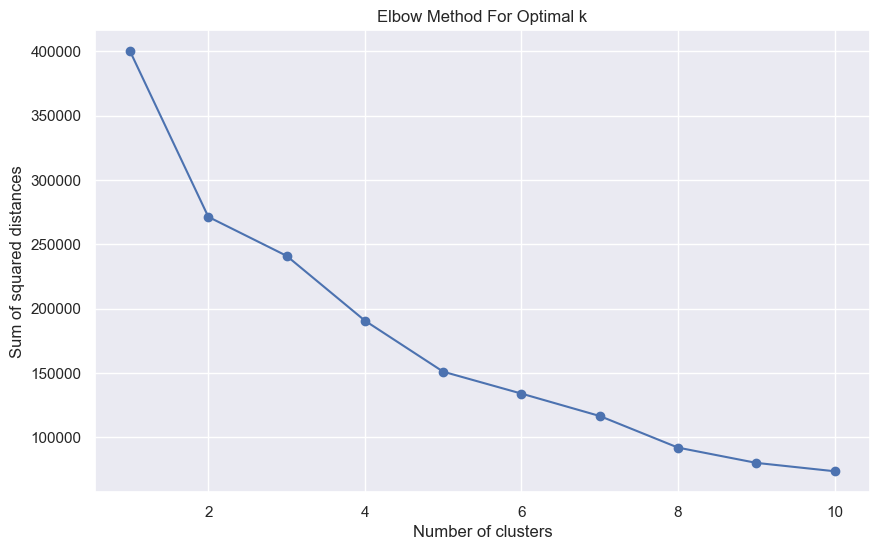

In [214]:
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

In [215]:
# Perform clustering using KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
encoded_df['product_cluster'] = kmeans.fit_predict(scaled_features)

# Split Data

In [216]:
# Drop the target variable column from the DataFrame
features = encoded_df.drop(['label','retailweek'], axis=1).columns.tolist()
X=encoded_df[features]
y = encoded_df['label']

In [217]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [218]:
ros = SMOTE(random_state=42)
x_res, y_res = ros.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.1, random_state=42)

In [219]:
# check balanced data
y_train.value_counts()

label
1    77468
0    77461
Name: count, dtype: int64

# Feature Selection

In [220]:
x_train.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'promo1', 'promo2', 'article.1', 'productgroup', 'category', 'cost',
       'style', 'sizes', 'gender', 'rgb_r_main_col', 'rgb_g_main_col',
       'rgb_b_main_col', 'rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col',
       'year', 'month', 'day', 'DayOfWeek_No', 'MonthOfYear', 'profit',
       'trend', 'seasonal', 'residual', 'discount', 'prices_diff',
       'article_letters', 'article_letter_frequency', 'product_cluster'],
      dtype='object')

In [221]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [222]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
pd.set_option('display.float_format', '{:.4f}'.format)
print(feature_scores)

discount                   0.2695
prices_diff                0.1108
current_price              0.0711
seasonal                   0.0677
profit                     0.0618
regular_price              0.0515
article                    0.0451
article_letters            0.0422
sales                      0.0398
month                      0.0299
MonthOfYear                0.0245
day                        0.0210
article_letter_frequency   0.0172
trend                      0.0155
cost                       0.0136
residual                   0.0134
rgb_g_main_col             0.0132
rgb_b_main_col             0.0128
rgb_r_main_col             0.0106
country                    0.0101
year                       0.0077
style                      0.0070
category                   0.0068
rgb_b_sec_col              0.0066
rgb_r_sec_col              0.0060
rgb_g_sec_col              0.0059
productgroup               0.0053
gender                     0.0038
product_cluster            0.0038
promo1        

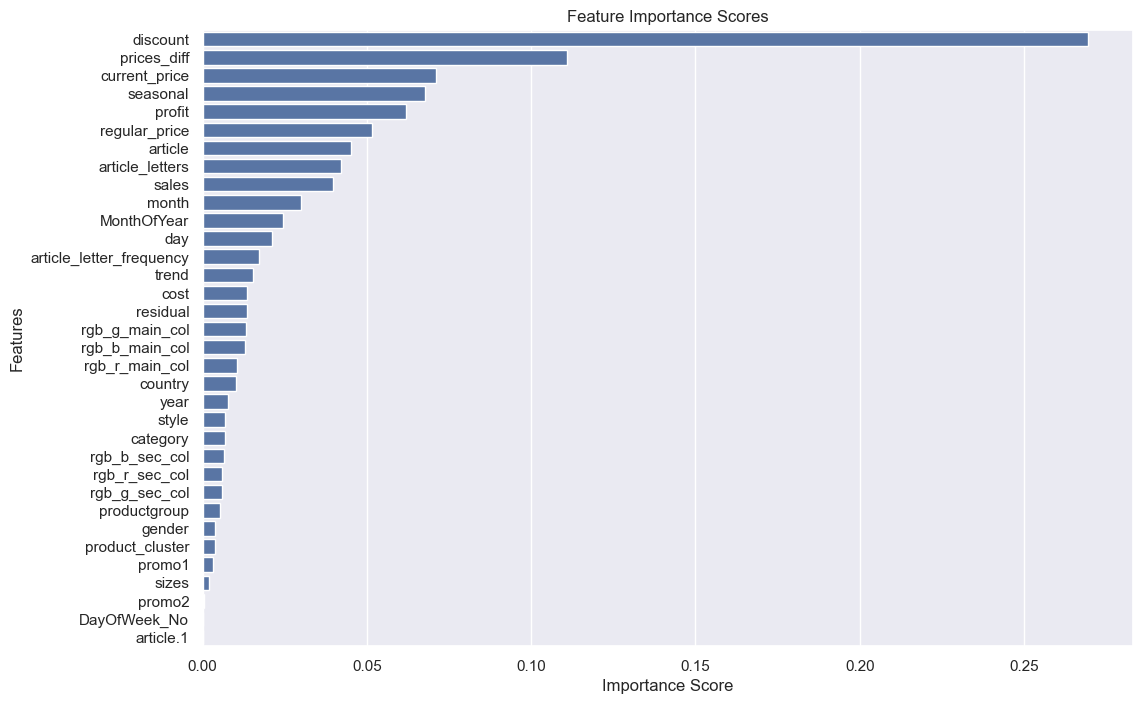

In [223]:
# Sort the feature scores in descending order
feature_scores = feature_scores.sort_values(ascending=False)

# Plot the feature importance scores
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_scores.values, y=feature_scores.index)
plt.title('Feature Importance Scores')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Modeling 

In [224]:
selected_features = ['discount','sales','profit','prices_diff','article','seasonal','product_cluster','day','MonthOfYear','country','promo1','promo2']
x_train = x_train.loc[ :,selected_features]
x_test = x_test.loc[ :,selected_features]

In [225]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [226]:
y_pred=model.predict(x_test)
print('#'*50)
print('The F1 Score of the RandomForestClassifier is', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

##################################################
The F1 Score of the RandomForestClassifier is 0.8905876174359573
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      8611
           1       0.89      0.89      0.89      8604

    accuracy                           0.89     17215
   macro avg       0.89      0.89      0.89     17215
weighted avg       0.89      0.89      0.89     17215



In [227]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

print('#' * 50)
print('The F1 Score of the DecisionTreeClassifier is', f1_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

##################################################
The F1 Score of the DecisionTreeClassifier is 0.8802882380288238
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      8611
           1       0.88      0.88      0.88      8604

    accuracy                           0.88     17215
   macro avg       0.88      0.88      0.88     17215
weighted avg       0.88      0.88      0.88     17215



In [228]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

print('#' * 50)
print('The F1 Score of the LogisticRegression is', f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

##################################################
The F1 Score of the LogisticRegression is 0.7878517195176418
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      8611
           1       0.76      0.82      0.79      8604

    accuracy                           0.78     17215
   macro avg       0.78      0.78      0.78     17215
weighted avg       0.78      0.78      0.78     17215



* Comparing each models,we will choose Random Forest Model based on a number of reasons,among them is its better performance metrices and its robustness to overfiting.We might go with other more comlex tree bases ensemple methods but Random Forest will be a more interpretable model.

We can make use of Explainable AI and apply LIME on our predictions

In [230]:
# Apply LIME to explain the predictions of the model
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=features,
    class_names=['Class 0', 'Class 1'],
    mode='classification'
)

# Choose a sample to explain
sample_index = 2  # Example index; change as needed
sample = x_test.iloc[sample_index]

# Explain the prediction of the chosen sample
exp = explainer.explain_instance(data_row=sample, predict_fn=model.predict_proba)

# Show the explanation
exp.show_in_notebook(show_table=True, show_all=False)

**These are the predicted probabilities for the given instance:**

* The model predicts that there is a 5% chance that the instance belongs to Class 0.
* The model predicts that there is a 95% chance that the instance belongs to Class 1.
* Given these probabilities, the model has predicted the instance to be Class 1.

# Some reccomendations based on insights

* It is better to Focus on Store events instead of media advertisements in France and try launch store events into Germany and Austria to see how well it will do there.
* Customers Germany although being represented more than others, they need more products and offers meeting thier needs.
* To ensure the effectiveness of media campaigns,it is  better to drop them before the targeted periods with sufficient time.
* The company should try to take adantage of the high number of Women segment and provide more appealing prices and products